# Accident Risk Alert System 

# 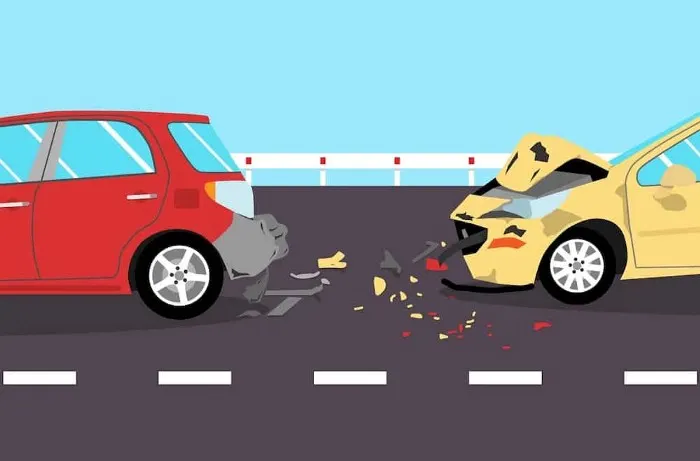

# Problem Objective 

The objective of this project is to develop a data-driven Accident Risk Alert System that can analyze real-time and historical data (such as vehicle telematics, weather, road, and traffic conditions) to predict the likelihood of accidents and generate timely alerts.
By accurately identifying high-risk situations before an accident occurs, the system aims to:

Enhance driver safety by issuing preventive alerts.

Reduce accident rates through proactive intervention.

Support smart city and fleet management systems in monitoring road safety.

Optimize insurance and policy planning by providing risk scores.

# STEP 1 Import important modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
print('All Modules Loaded Successfully!')

All Modules Loaded Successfully!


#  Step 2 Loading Data

In [2]:
df = pd.read_csv(r'C:\Users\prerna dhamija\Downloads\gaurav python\accident_prediction_india.csv')
print('Done')

Done


#  Step 3 Understanding Data using EDA 

In [3]:
#3.1 data head
df.head()

,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Road Type,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details
0,Jammu and Kashmir,Unknown,2021,May,Monday,01:46,Serious,5,Cycle,0,...,National Highway,Wet,Dark,Signs,61,66,Male,NaN,Yes,Curve
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30,Minor,5,Truck,5,...,Urban Road,Dry,Dusk,Signs,92,60,Male,NaN,Yes,Straight Road
2,Chhattisgarh,Unknown,2023,May,Wednesday,05:37,Minor,5,Pedestrian,6,...,National Highway,Under Construction,Dawn,Signs,120,26,Female,NaN,No,Bridge
3,Uttar Pradesh,Lucknow,2020,June,Saturday,00:31,Minor,3,Bus,10,...,State Highway,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road
4,Sikkim,Unknown,2021,August,Thursday,11:21,Minor,5,Cycle,7,...,Urban Road,Wet,Dusk,Signs,115,30,Male,NaN,No,Intersection


In [4]:
# 3.2 data tail 
df.tail()

,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Road Type,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details
2995,Tamil Nadu,Chennai,2021,January,Sunday,01:15,Minor,5,Truck,4,...,National Highway,Wet,Dark,Signs,74,43,Male,Expired,Yes,Intersection
2996,Uttarakhand,Unknown,2018,July,Sunday,10:12,Fatal,3,Car,3,...,Urban Road,Under Construction,Daylight,NaN,86,23,Female,NaN,Yes,Intersection
2997,Meghalaya,Unknown,2021,January,Thursday,19:34,Minor,2,Two-Wheeler,8,...,National Highway,Dry,Dark,Signs,47,57,Female,Valid,Yes,Intersection
2998,Meghalaya,Unknown,2023,June,Sunday,20:54,Fatal,1,Cycle,9,...,Urban Road,Under Construction,Daylight,Signs,60,28,Female,Expired,Yes,Bridge
2999,Arunachal Pradesh,Unknown,2020,September,Monday,07:19,Fatal,5,Cycle,1,...,National Highway,Under Construction,Daylight,NaN,40,66,Male,NaN,Yes,Bridge


In [5]:
# 3.3 data shape
df.shape

(3000, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   State Name                   3000 non-null   object
 1   City Name                    3000 non-null   object
 2   Year                         3000 non-null   int64 
 3   Month                        3000 non-null   object
 4   Day of Week                  3000 non-null   object
 5   Time of Day                  3000 non-null   object
 6   Accident Severity            3000 non-null   object
 7   Number of Vehicles Involved  3000 non-null   int64 
 8   Vehicle Type Involved        3000 non-null   object
 9   Number of Casualties         3000 non-null   int64 
 10  Number of Fatalities         3000 non-null   int64 
 11  Weather Conditions           3000 non-null   object
 12  Road Type                    3000 non-null   object
 13  Road Condition               3000

In [7]:
df.columns

Index(['State Name', 'City Name', 'Year', 'Month', 'Day of Week',
       'Time of Day', 'Accident Severity', 'Number of Vehicles Involved',
       'Vehicle Type Involved', 'Number of Casualties', 'Number of Fatalities',
       'Weather Conditions', 'Road Type', 'Road Condition',
       'Lighting Conditions', 'Traffic Control Presence', 'Speed Limit (km/h)',
       'Driver Age', 'Driver Gender', 'Driver License Status',
       'Alcohol Involvement', 'Accident Location Details'],
      dtype='object')

In [8]:
df.isna().sum()
#No null value found
# in case of null:remove, fill, replace, drop

State Name                       0
City Name                        0
Year                             0
Month                            0
Day of Week                      0
Time of Day                      0
Accident Severity                0
Number of Vehicles Involved      0
Vehicle Type Involved            0
Number of Casualties             0
Number of Fatalities             0
Weather Conditions               0
Road Type                        0
Road Condition                   0
Lighting Conditions              0
Traffic Control Presence       716
Speed Limit (km/h)               0
Driver Age                       0
Driver Gender                    0
Driver License Status          975
Alcohol Involvement              0
Accident Location Details        0
dtype: int64

In [9]:
df['Month']

0             May
1         January
2             May
3            June
4          August
          ...    
2995      January
2996         July
2997      January
2998         June
2999    September
Name: Month, Length: 3000, dtype: object

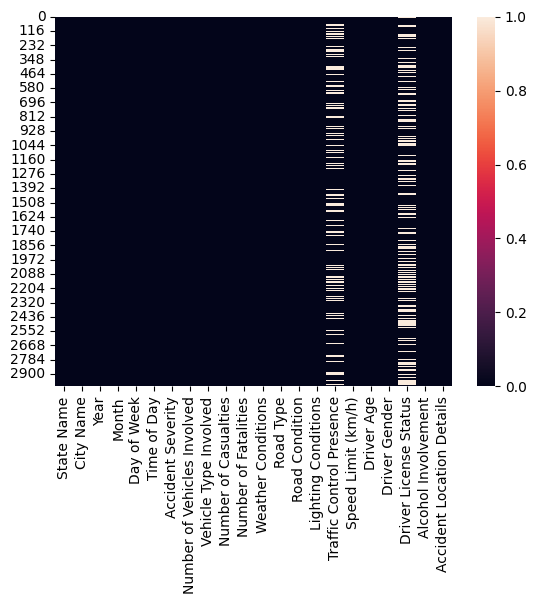

In [10]:
sns.heatmap(df.isna())
plt.show()

In [11]:
df.isna().mean().sort_values(ascending=False)*100

Driver License Status          32.500000
Traffic Control Presence       23.866667
State Name                      0.000000
City Name                       0.000000
Alcohol Involvement             0.000000
Driver Gender                   0.000000
Driver Age                      0.000000
Speed Limit (km/h)              0.000000
Lighting Conditions             0.000000
Road Condition                  0.000000
Road Type                       0.000000
Weather Conditions              0.000000
Number of Fatalities            0.000000
Number of Casualties            0.000000
Vehicle Type Involved           0.000000
Number of Vehicles Involved     0.000000
Accident Severity               0.000000
Time of Day                     0.000000
Day of Week                     0.000000
Month                           0.000000
Year                            0.000000
Accident Location Details       0.000000
dtype: float64

In [12]:
df['Driver License Status']

0           NaN
1           NaN
2           NaN
3         Valid
4           NaN
         ...   
2995    Expired
2996        NaN
2997      Valid
2998    Expired
2999        NaN
Name: Driver License Status, Length: 3000, dtype: object

In [13]:
df['Driver License Status'].fillna('Unknown', inplace=True)
print('done')

done


In [14]:
print(df['Driver License Status'].value_counts())

Driver License Status
Valid      1057
Unknown     975
Expired     968
Name: count, dtype: int64


In [15]:
df['Driver License Status']

0       Unknown
1       Unknown
2       Unknown
3         Valid
4       Unknown
         ...   
2995    Expired
2996    Unknown
2997      Valid
2998    Expired
2999    Unknown
Name: Driver License Status, Length: 3000, dtype: object

In [16]:
df.isna().mean().sort_values(ascending=False)*100

Traffic Control Presence       23.866667
State Name                      0.000000
City Name                       0.000000
Alcohol Involvement             0.000000
Driver License Status           0.000000
Driver Gender                   0.000000
Driver Age                      0.000000
Speed Limit (km/h)              0.000000
Lighting Conditions             0.000000
Road Condition                  0.000000
Road Type                       0.000000
Weather Conditions              0.000000
Number of Fatalities            0.000000
Number of Casualties            0.000000
Vehicle Type Involved           0.000000
Number of Vehicles Involved     0.000000
Accident Severity               0.000000
Time of Day                     0.000000
Day of Week                     0.000000
Month                           0.000000
Year                            0.000000
Accident Location Details       0.000000
dtype: float64

In [17]:
df['Traffic Control Presence']

0         Signs
1         Signs
2         Signs
3       Signals
4         Signs
         ...   
2995      Signs
2996        NaN
2997      Signs
2998      Signs
2999        NaN
Name: Traffic Control Presence, Length: 3000, dtype: object

In [18]:
df['Traffic Control Presence'].fillna('Unknown', inplace=True)

In [19]:
print(df['Traffic Control Presence'].value_counts())

Traffic Control Presence
Signs               812
Signals             736
Police Checkpost    736
Unknown             716
Name: count, dtype: int64


In [20]:
df.isna().mean().sort_values(ascending=False)*100

State Name                     0.0
City Name                      0.0
Alcohol Involvement            0.0
Driver License Status          0.0
Driver Gender                  0.0
Driver Age                     0.0
Speed Limit (km/h)             0.0
Traffic Control Presence       0.0
Lighting Conditions            0.0
Road Condition                 0.0
Road Type                      0.0
Weather Conditions             0.0
Number of Fatalities           0.0
Number of Casualties           0.0
Vehicle Type Involved          0.0
Number of Vehicles Involved    0.0
Accident Severity              0.0
Time of Day                    0.0
Day of Week                    0.0
Month                          0.0
Year                           0.0
Accident Location Details      0.0
dtype: float64

In [21]:
df.describe()

,Year,Number of Vehicles Involved,Number of Casualties,Number of Fatalities,Speed Limit (km/h),Driver Age
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000
mean,2020.530000,2.996000,5.066000,2.455333,74.940667,44.17700
std,1.683858,1.428285,3.214097,1.717650,26.765088,15.40286
min,2018.000000,1.000000,0.000000,0.000000,30.000000,18.00000
25%,2019.000000,2.000000,2.000000,1.000000,51.000000,31.00000
50%,2021.000000,3.000000,5.000000,2.000000,75.000000,45.00000
75%,2022.000000,4.000000,8.000000,4.000000,99.000000,57.00000
max,2023.000000,5.000000,10.000000,5.000000,120.000000,70.00000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   State Name                   3000 non-null   object
 1   City Name                    3000 non-null   object
 2   Year                         3000 non-null   int64 
 3   Month                        3000 non-null   object
 4   Day of Week                  3000 non-null   object
 5   Time of Day                  3000 non-null   object
 6   Accident Severity            3000 non-null   object
 7   Number of Vehicles Involved  3000 non-null   int64 
 8   Vehicle Type Involved        3000 non-null   object
 9   Number of Casualties         3000 non-null   int64 
 10  Number of Fatalities         3000 non-null   int64 
 11  Weather Conditions           3000 non-null   object
 12  Road Type                    3000 non-null   object
 13  Road Condition               3000

In [23]:
df.drop('Number of Casualties' ,axis =1 , inplace = True)

In [24]:
df.drop('Number of Fatalities' ,axis =1 , inplace = True)

Accident Severity
Minor      1034
Fatal       985
Serious     981
Name: count, dtype: int64


<Axes: xlabel='Accident Severity'>

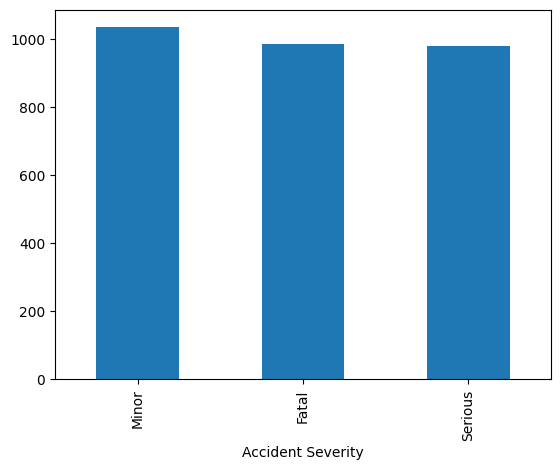

In [25]:
print(df['Accident Severity'].value_counts())
df['Accident Severity'].value_counts().plot(kind='bar')

In [26]:
def extract_hour(t):
    try:
        s = str(t).strip()
        if ':' in s:
            return int(s.split(':')[0])  # Take part before colon
        return int(float(s))  # If it's just a number like 14 or 7.0
    except:
        return None

df['Hour'] = df['Time of Day'].apply(extract_hour)
df['Hour'] = df['Hour'].fillna(df['Hour'].median()).astype(int)

# Convert Hour → Day / Evening / Night
def day_night(h):
        if (h >= 20) or (h <= 5):
            return 'Night'
        elif h <= 17:
            return 'Day'
        else:
            return 'Evening'

df['DayNight'] = df['Hour'].apply(day_night)

In [27]:
df.head()

,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Weather Conditions,...,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details,Hour,DayNight
0,Jammu and Kashmir,Unknown,2021,May,Monday,01:46,Serious,5,Cycle,Hazy,...,Dark,Signs,61,66,Male,Unknown,Yes,Curve,1,Night
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30,Minor,5,Truck,Hazy,...,Dusk,Signs,92,60,Male,Unknown,Yes,Straight Road,21,Night
2,Chhattisgarh,Unknown,2023,May,Wednesday,05:37,Minor,5,Pedestrian,Foggy,...,Dawn,Signs,120,26,Female,Unknown,No,Bridge,5,Night
3,Uttar Pradesh,Lucknow,2020,June,Saturday,00:31,Minor,3,Bus,Rainy,...,Dark,Signals,76,34,Female,Valid,Yes,Straight Road,0,Night
4,Sikkim,Unknown,2021,August,Thursday,11:21,Minor,5,Cycle,Foggy,...,Dusk,Signs,115,30,Male,Unknown,No,Intersection,11,Day


In [28]:
df['Time of Day'].unique()

array(['01:46', '21:30', '05:37', ..., '21:36', '10:16', '19:36'],
      dtype=object)

In [29]:
def extract_hour(t):
    try:
        # Handle both string and numeric time
        if pd.isnull(t):
            return np.nan
        s = str(t).strip()
        if ':' in s:
            return int(s.split(':')[0])   # extract hour before colon
        else:
            return int(float(s))          # handle numeric cases
    except:
        return np.nan

df['Hour'] = df['Time of Day'].apply(extract_hour)

# Step 2: Fill missing hours with median
df['Hour'] = df['Hour'].fillna(df['Hour'].median()).astype(int)

# Step 3: Convert hour to time period (Day, Evening, Night)
def day_night(h):
    if h >= 20 or h < 6:
        return 'Night'
    elif h < 17:
        return 'Day'
    else:
        return 'Evening'

df['DayNight'] = df['Hour'].apply(day_night)

df[['Time of Day', 'Hour', 'DayNight']].head()

,Time of Day,Hour,DayNight
0,01:46,1,Night
1,21:30,21,Night
2,05:37,5,Night
3,00:31,0,Night
4,11:21,11,Day


In [30]:
df .head()

,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Weather Conditions,...,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details,Hour,DayNight
0,Jammu and Kashmir,Unknown,2021,May,Monday,01:46,Serious,5,Cycle,Hazy,...,Dark,Signs,61,66,Male,Unknown,Yes,Curve,1,Night
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30,Minor,5,Truck,Hazy,...,Dusk,Signs,92,60,Male,Unknown,Yes,Straight Road,21,Night
2,Chhattisgarh,Unknown,2023,May,Wednesday,05:37,Minor,5,Pedestrian,Foggy,...,Dawn,Signs,120,26,Female,Unknown,No,Bridge,5,Night
3,Uttar Pradesh,Lucknow,2020,June,Saturday,00:31,Minor,3,Bus,Rainy,...,Dark,Signals,76,34,Female,Valid,Yes,Straight Road,0,Night
4,Sikkim,Unknown,2021,August,Thursday,11:21,Minor,5,Cycle,Foggy,...,Dusk,Signs,115,30,Male,Unknown,No,Intersection,11,Day


In [31]:
df.drop(['Time of Day', 'Hour'], axis=1, inplace=True)

In [32]:
df.head()

,State Name,City Name,Year,Month,Day of Week,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Weather Conditions,Road Type,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details,DayNight
0,Jammu and Kashmir,Unknown,2021,May,Monday,Serious,5,Cycle,Hazy,National Highway,Wet,Dark,Signs,61,66,Male,Unknown,Yes,Curve,Night
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,Minor,5,Truck,Hazy,Urban Road,Dry,Dusk,Signs,92,60,Male,Unknown,Yes,Straight Road,Night
2,Chhattisgarh,Unknown,2023,May,Wednesday,Minor,5,Pedestrian,Foggy,National Highway,Under Construction,Dawn,Signs,120,26,Female,Unknown,No,Bridge,Night
3,Uttar Pradesh,Lucknow,2020,June,Saturday,Minor,3,Bus,Rainy,State Highway,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road,Night
4,Sikkim,Unknown,2021,August,Thursday,Minor,5,Cycle,Foggy,Urban Road,Wet,Dusk,Signs,115,30,Male,Unknown,No,Intersection,Day


In [33]:
df['DayNight']

0         Night
1         Night
2         Night
3         Night
4           Day
         ...   
2995      Night
2996        Day
2997    Evening
2998      Night
2999        Day
Name: DayNight, Length: 3000, dtype: object

In [34]:
df.columns

Index(['State Name', 'City Name', 'Year', 'Month', 'Day of Week',
       'Accident Severity', 'Number of Vehicles Involved',
       'Vehicle Type Involved', 'Weather Conditions', 'Road Type',
       'Road Condition', 'Lighting Conditions', 'Traffic Control Presence',
       'Speed Limit (km/h)', 'Driver Age', 'Driver Gender',
       'Driver License Status', 'Alcohol Involvement',
       'Accident Location Details', 'DayNight'],
      dtype='object')

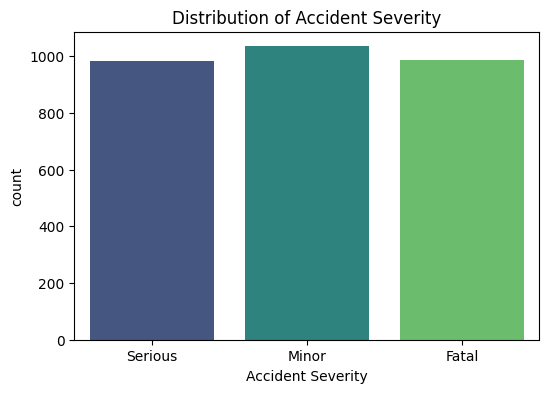

Accident Severity
Minor      1034
Fatal       985
Serious     981
Name: count, dtype: int64


In [35]:
target_col = 'Accident Severity' 
plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df, palette='viridis')
plt.title('Distribution of Accident Severity')
plt.show()

print(df[target_col].value_counts())

In [36]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

print("\nCategorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)


Categorical Columns: ['State Name', 'City Name', 'Month', 'Day of Week', 'Accident Severity', 'Vehicle Type Involved', 'Weather Conditions', 'Road Type', 'Road Condition', 'Lighting Conditions', 'Traffic Control Presence', 'Driver Gender', 'Driver License Status', 'Alcohol Involvement', 'Accident Location Details', 'DayNight']
Numerical Columns: ['Year', 'Number of Vehicles Involved', 'Speed Limit (km/h)', 'Driver Age']


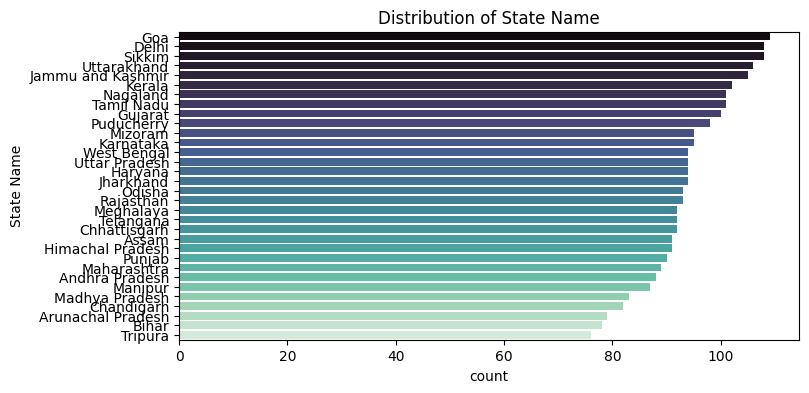

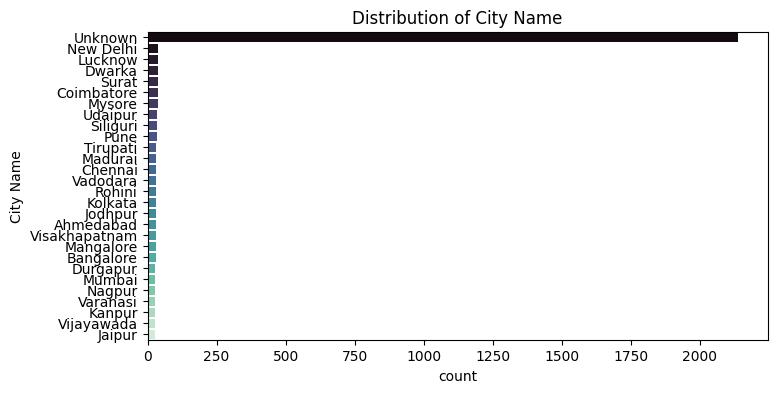

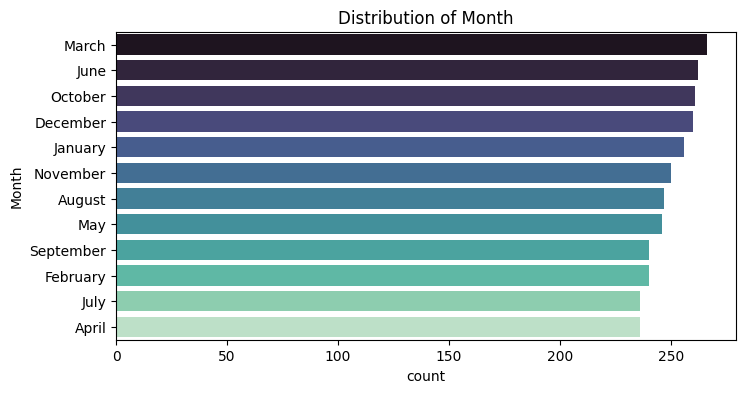

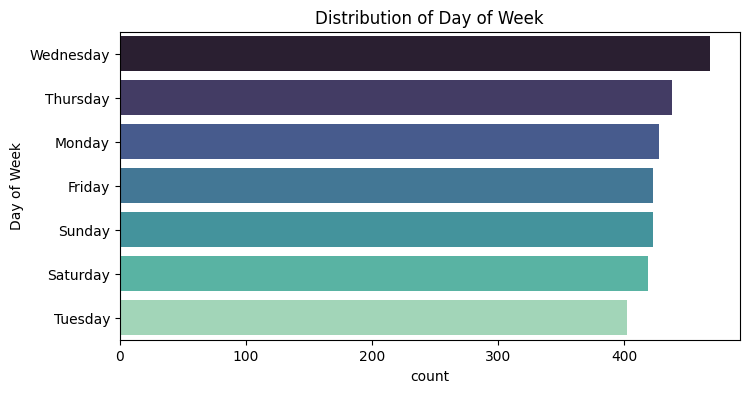

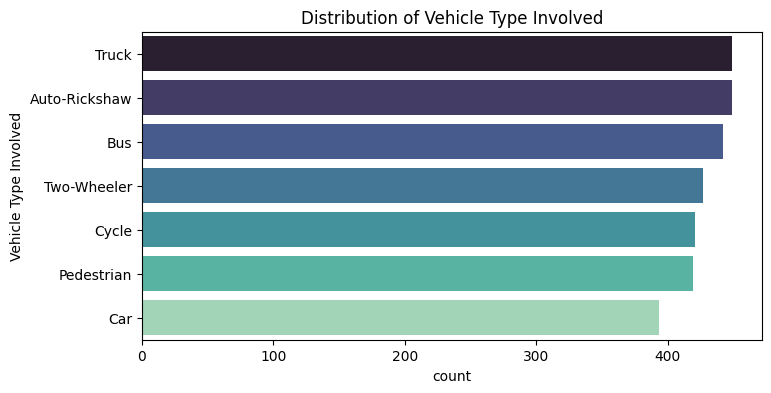

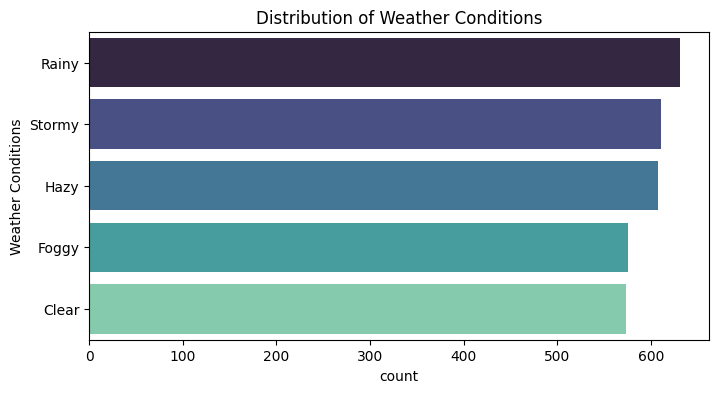

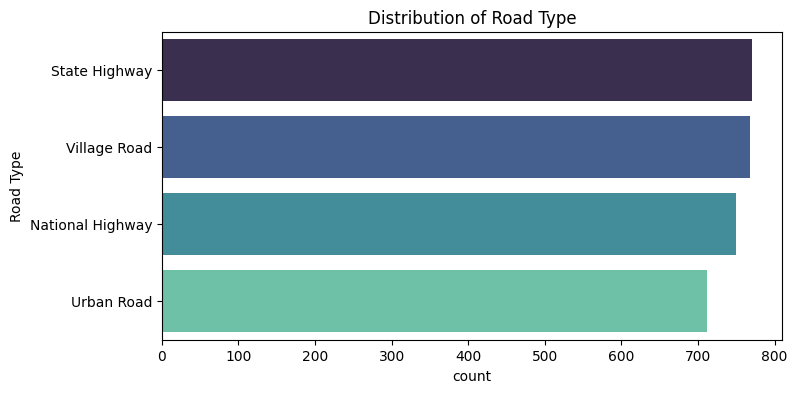

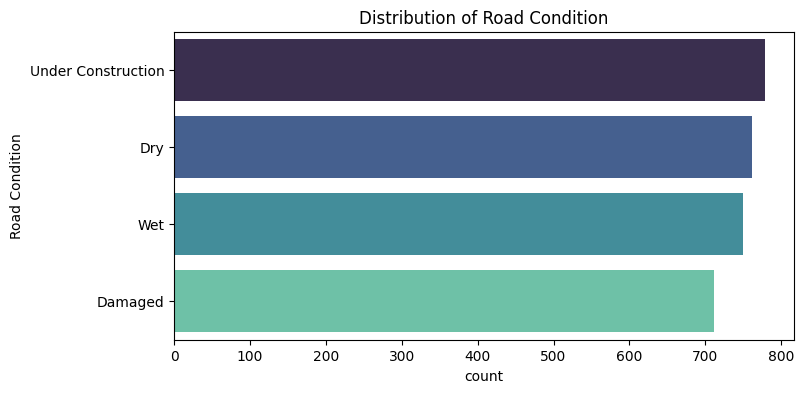

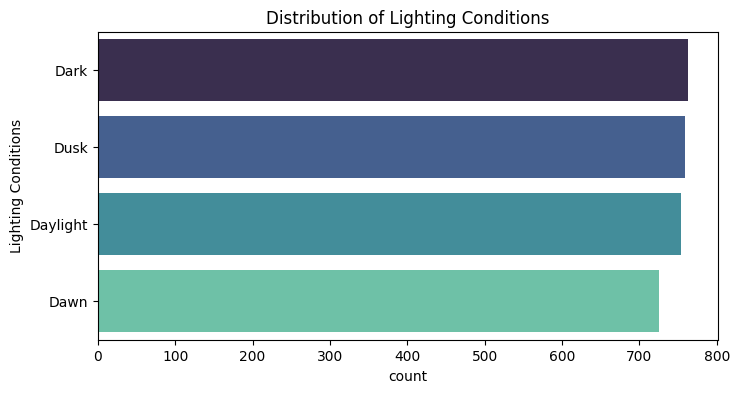

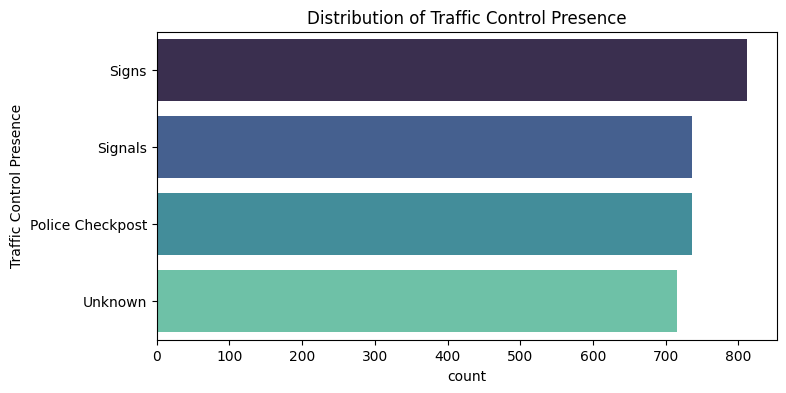

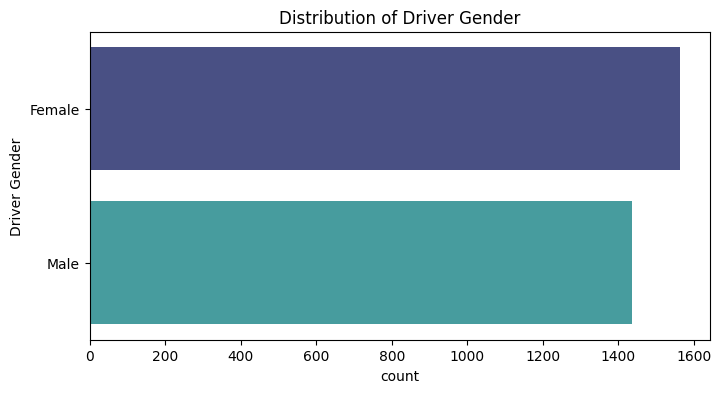

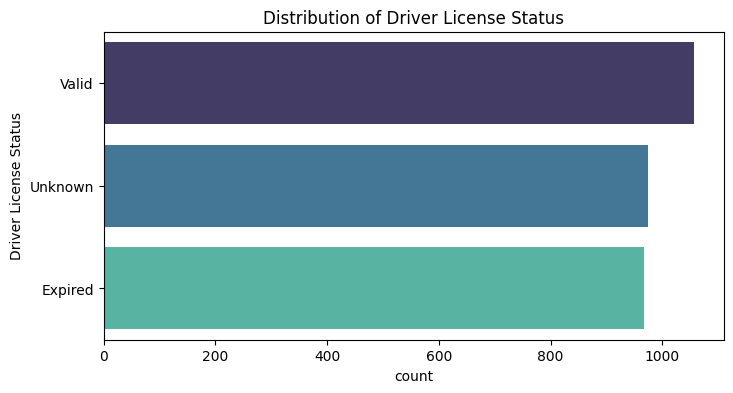

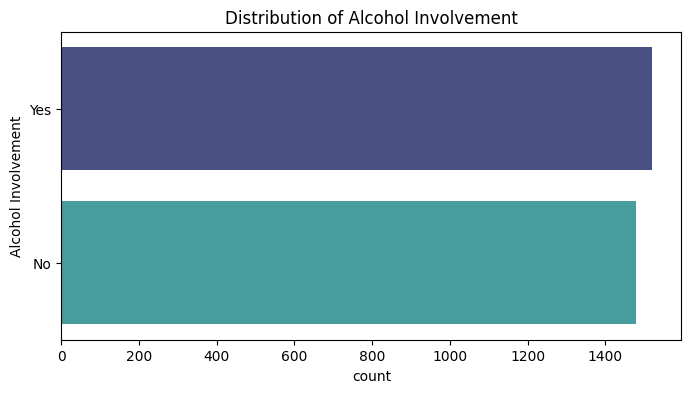

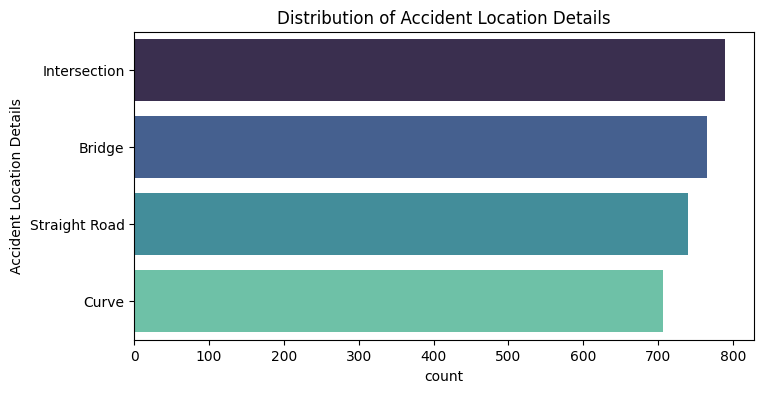

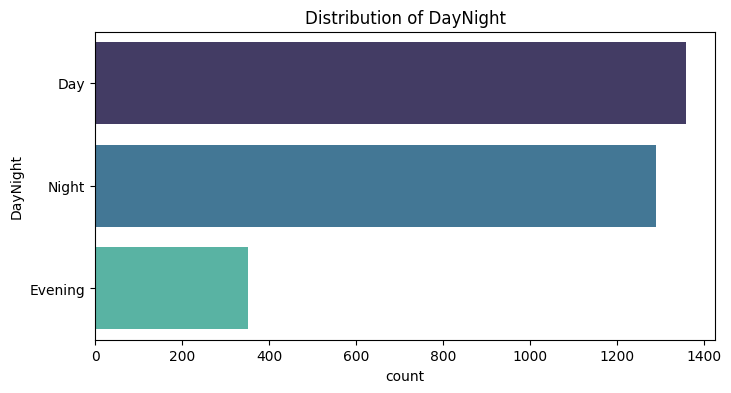

In [37]:
for col in cat_cols:
    if col != target_col:
        plt.figure(figsize=(8,4))
        sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='mako')
        plt.title(f'Distribution of {col}')
        plt.show()

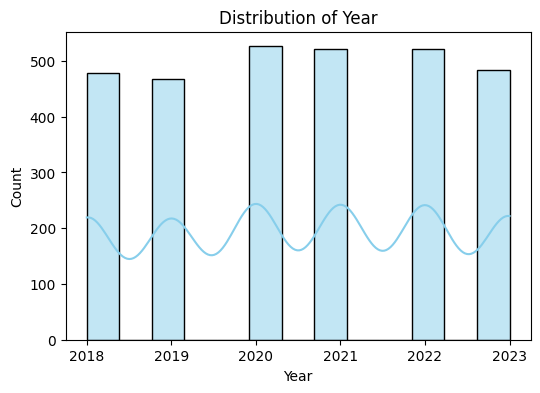

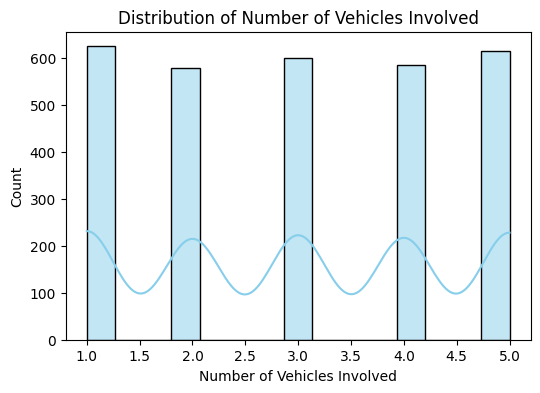

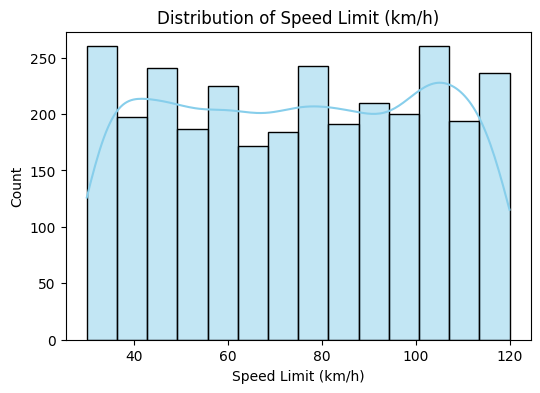

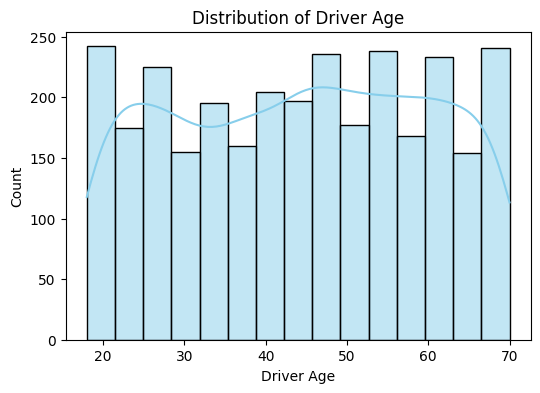

In [38]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()

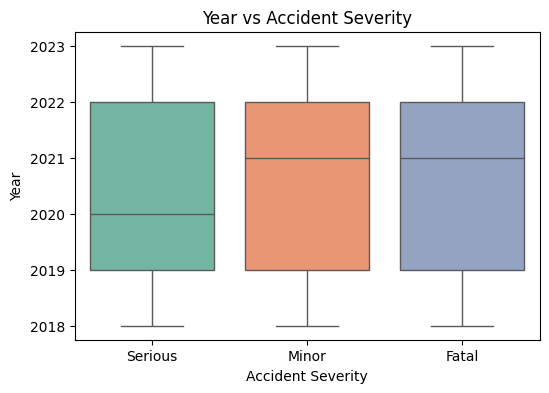

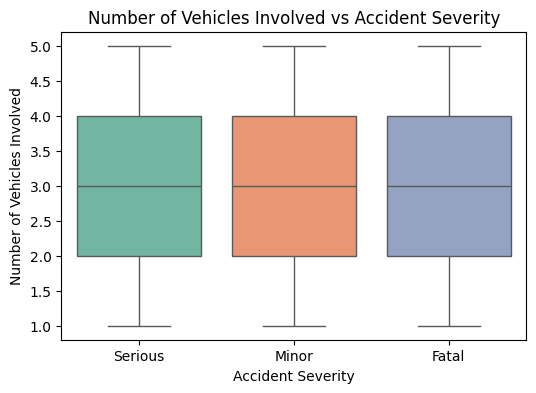

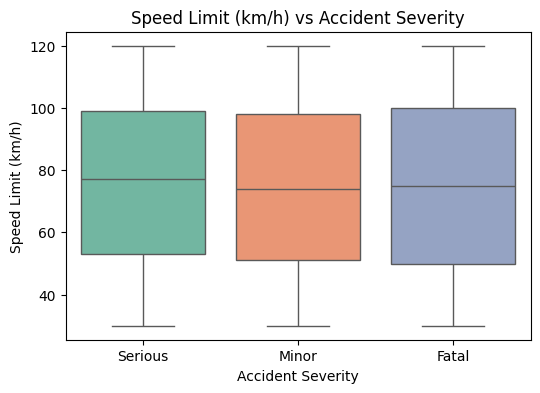

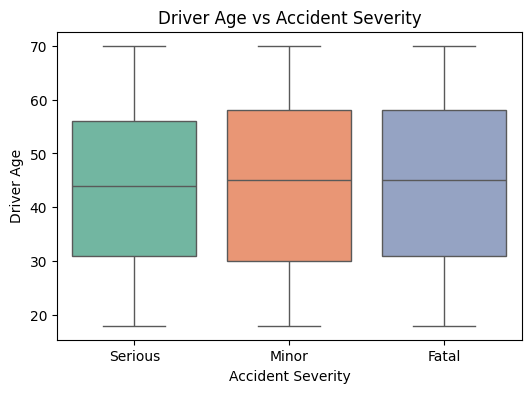

In [39]:
# Numerical vs Target
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=target_col, y=col, data=df, palette='Set2')
    plt.title(f'{col} vs {target_col}')
    plt.show()

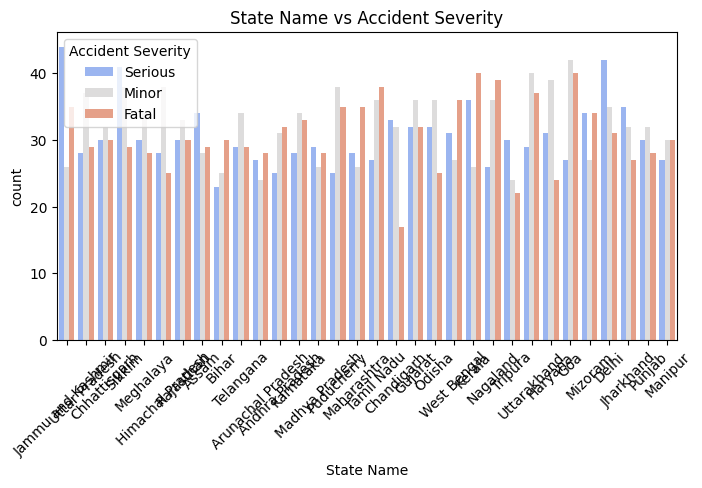

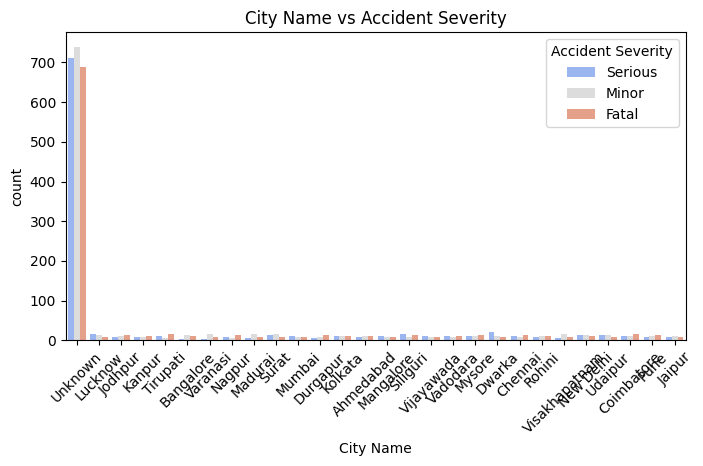

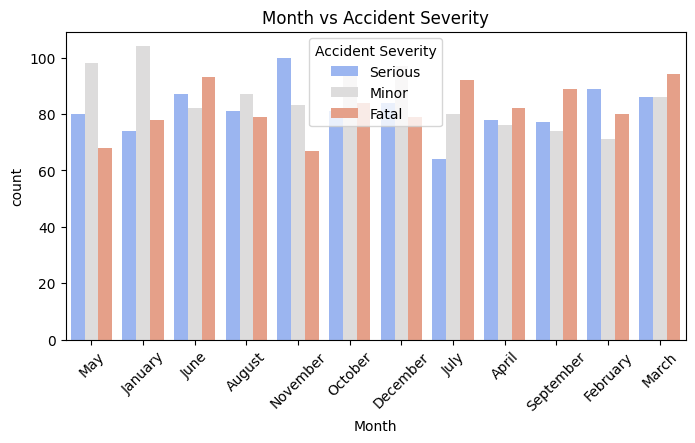

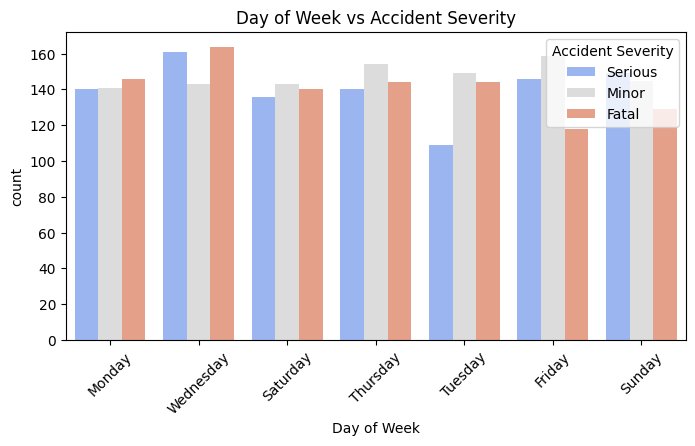

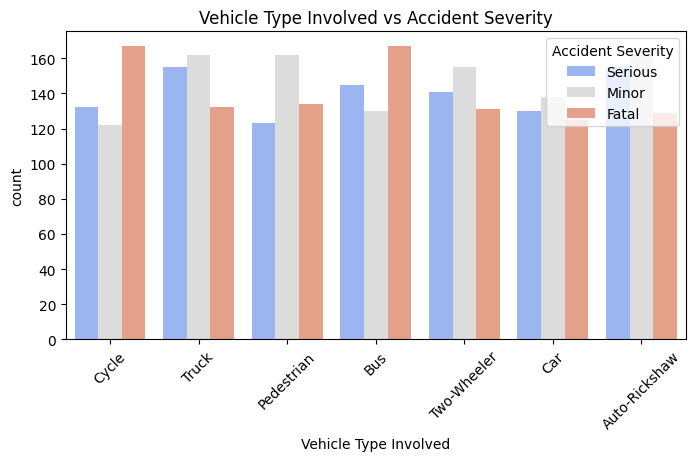

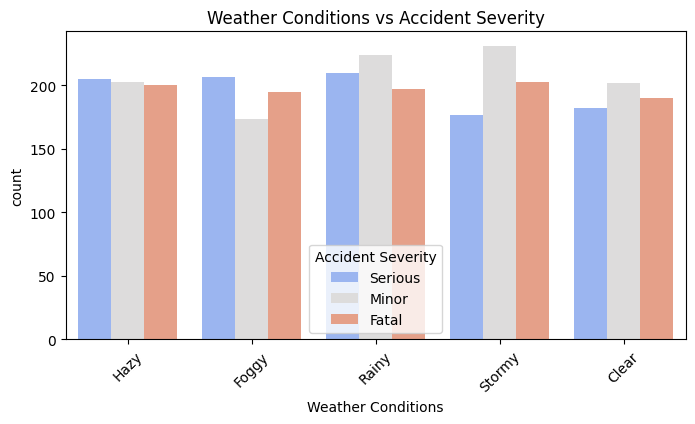

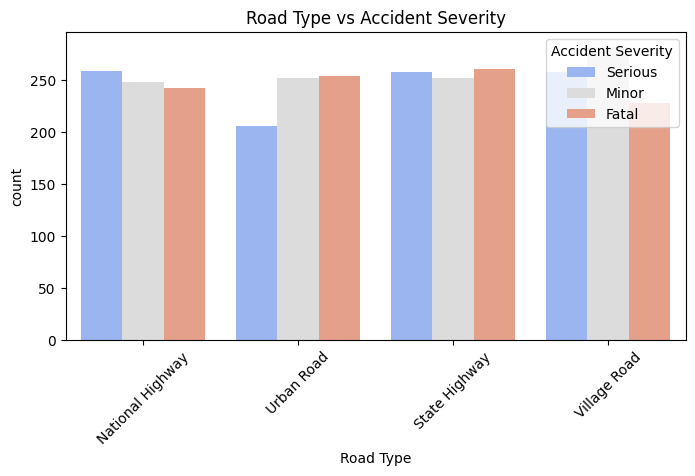

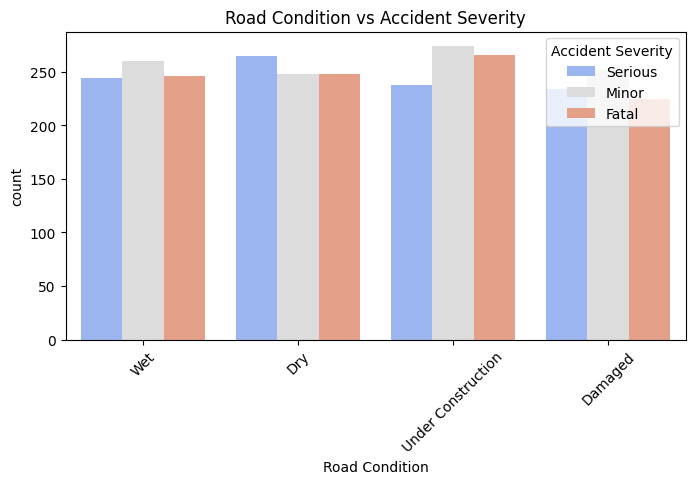

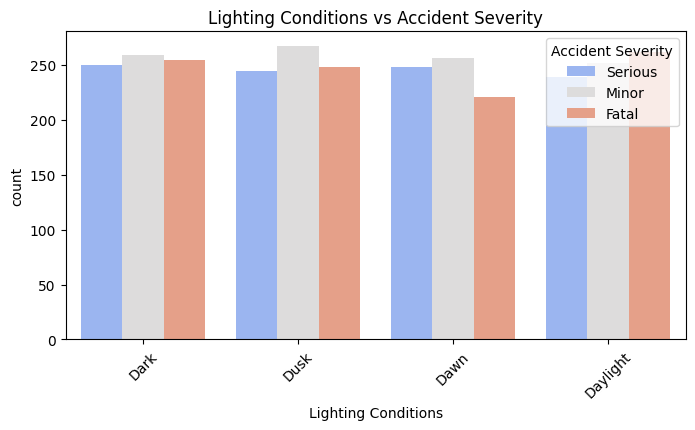

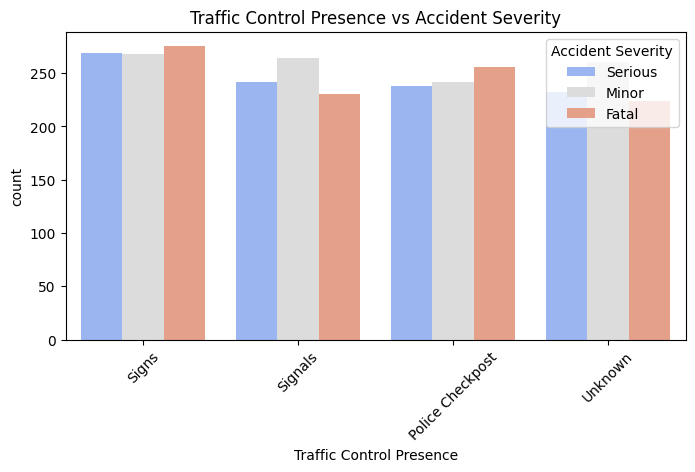

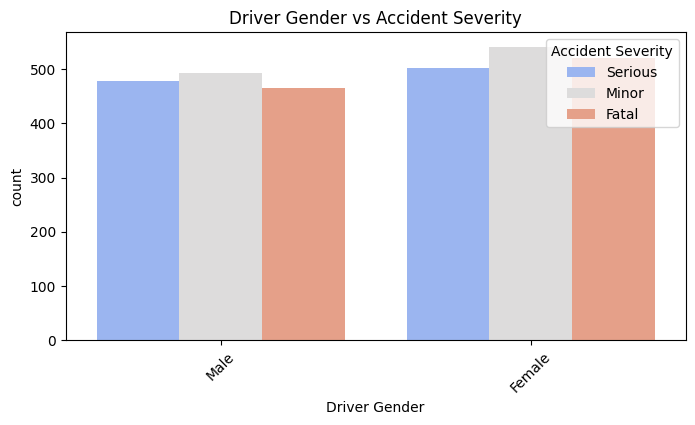

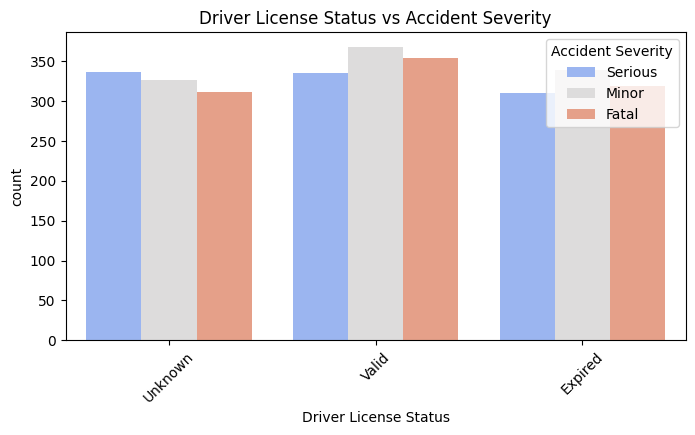

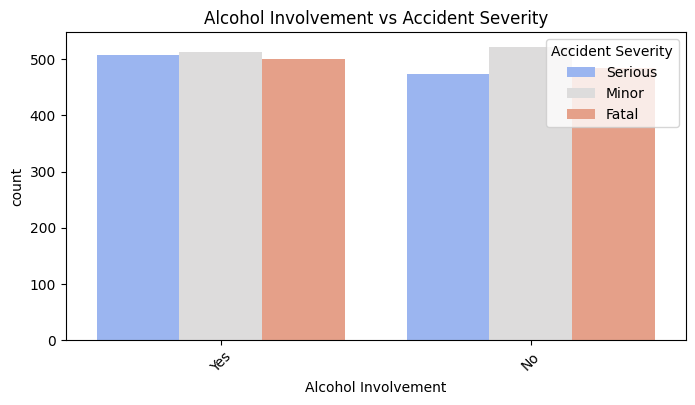

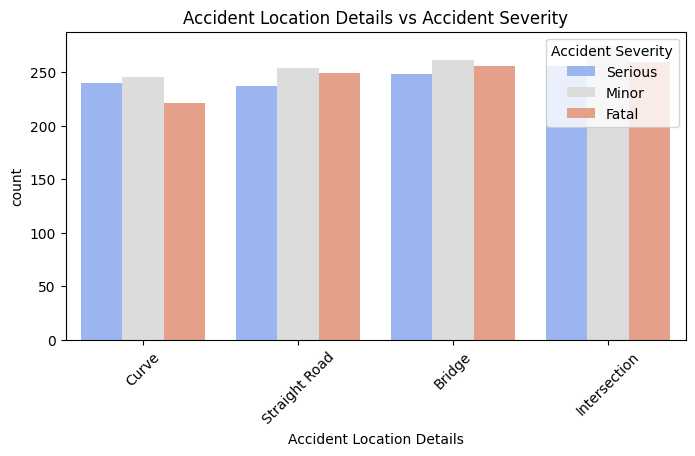

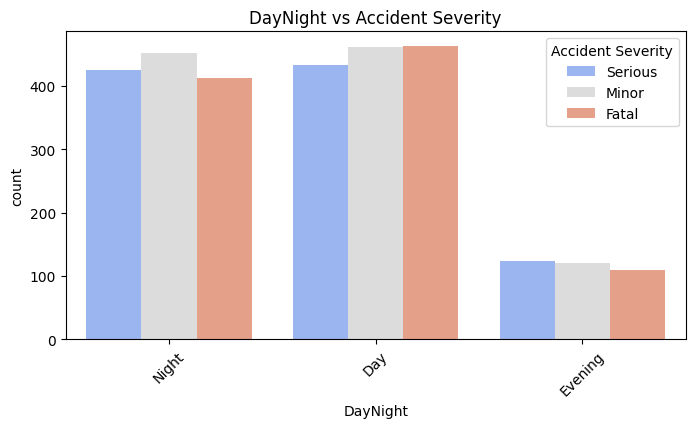

In [40]:
for col in cat_cols:
    if col != target_col:
        plt.figure(figsize=(8,4))
        sns.countplot(x=col, hue=target_col, data=df, palette='coolwarm')
        plt.title(f'{col} vs {target_col}')
        plt.xticks(rotation=45)
        plt.show()

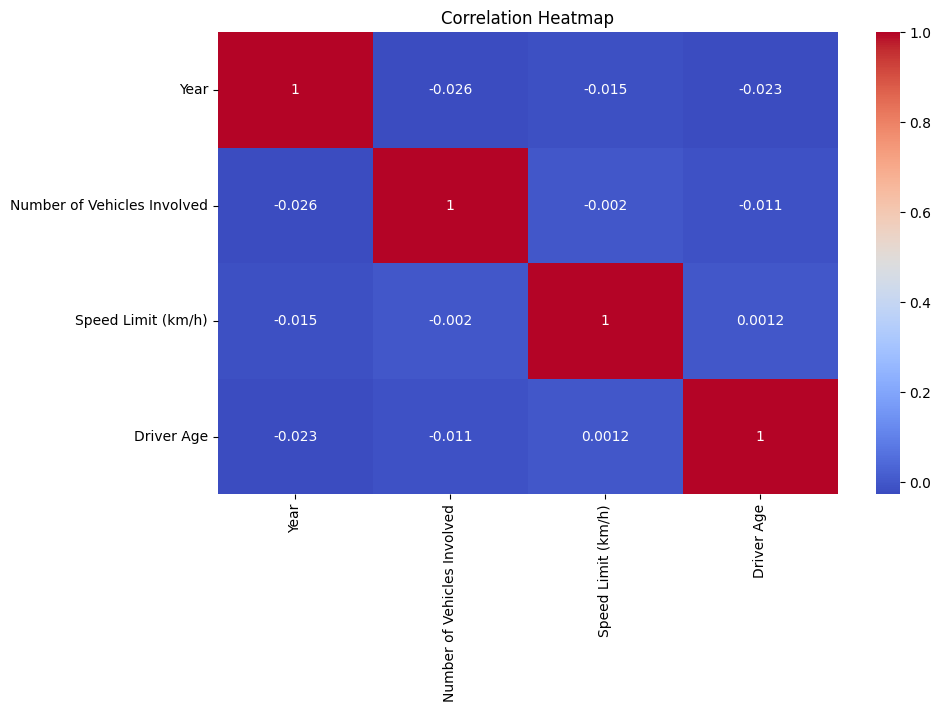

In [41]:
# numerical heatmap 
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [42]:
df.columns

Index(['State Name', 'City Name', 'Year', 'Month', 'Day of Week',
       'Accident Severity', 'Number of Vehicles Involved',
       'Vehicle Type Involved', 'Weather Conditions', 'Road Type',
       'Road Condition', 'Lighting Conditions', 'Traffic Control Presence',
       'Speed Limit (km/h)', 'Driver Age', 'Driver Gender',
       'Driver License Status', 'Alcohol Involvement',
       'Accident Location Details', 'DayNight'],
      dtype='object')

In [43]:
df['Accident Location Details']

0               Curve
1       Straight Road
2              Bridge
3       Straight Road
4        Intersection
            ...      
2995     Intersection
2996     Intersection
2997     Intersection
2998           Bridge
2999           Bridge
Name: Accident Location Details, Length: 3000, dtype: object

In [44]:
df = df.drop(columns=[
    'State Name', 
    'City Name', 
    'Accident Location Details', 
    'Year', 
    'Month', 
    # 'Day of Week'  # Optional: keep or remove based on your analysis
])

# Check remaining columns
print("Remaining columns:", df.columns.tolist())


Remaining columns: ['Day of Week', 'Accident Severity', 'Number of Vehicles Involved', 'Vehicle Type Involved', 'Weather Conditions', 'Road Type', 'Road Condition', 'Lighting Conditions', 'Traffic Control Presence', 'Speed Limit (km/h)', 'Driver Age', 'Driver Gender', 'Driver License Status', 'Alcohol Involvement', 'DayNight']


In [45]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", cat_cols)

Categorical columns: ['Day of Week', 'Accident Severity', 'Vehicle Type Involved', 'Weather Conditions', 'Road Type', 'Road Condition', 'Lighting Conditions', 'Traffic Control Presence', 'Driver Gender', 'Driver License Status', 'Alcohol Involvement', 'DayNight']


In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("✅ All categorical columns converted to numeric")

✅ All categorical columns converted to numeric


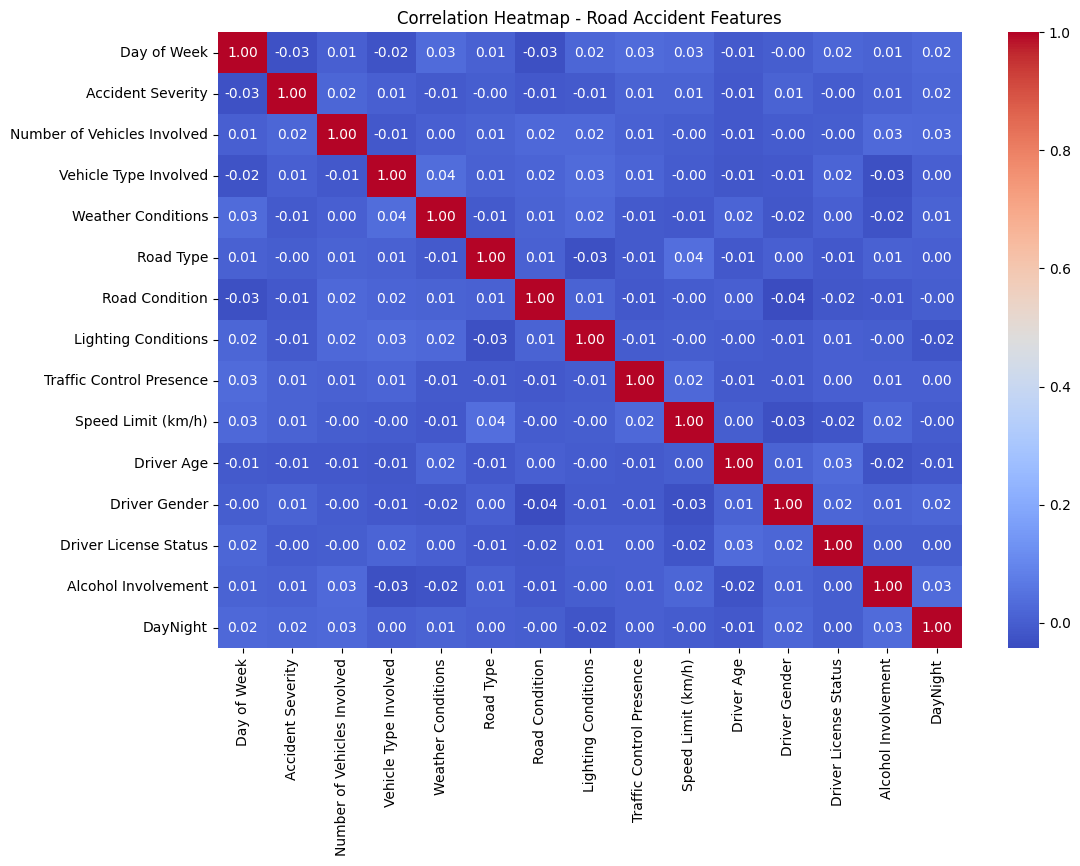

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Road Accident Features")
plt.show()

# Step 4: Training Data Into Train and Test

In [48]:
df.columns

Index(['Day of Week', 'Accident Severity', 'Number of Vehicles Involved',
       'Vehicle Type Involved', 'Weather Conditions', 'Road Type',
       'Road Condition', 'Lighting Conditions', 'Traffic Control Presence',
       'Speed Limit (km/h)', 'Driver Age', 'Driver Gender',
       'Driver License Status', 'Alcohol Involvement', 'DayNight'],
      dtype='object')

In [49]:
# divide data into target and features 
X = df.drop(columns=['Accident Severity'])
y = df['Accident Severity']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2400, 14)
(600, 14)
(2400,)
(600,)


# step 5 Multi Model Creation 

In [51]:
df = df.drop(columns=['City Name', 'Year', 'Month', 'Driver License Status'], errors='ignore')


In [52]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()# model object 

model_lr.fit(X_train,y_train) 

LogisticRegression()

In [53]:
df.shape

(3000, 14)

In [54]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# ✅ 1. Encode target column (Accident Severity)
le = LabelEncoder()
df['Accident Severity'] = le.fit_transform(df['Accident Severity'])

print("✅ Target column encoded successfully!")
print(dict(zip(le.classes_, le.transform(le.classes_))))

# ✅ 2. One-Hot Encode all other categorical columns
# (We drop the target so we don’t accidentally encode it)
X = df.drop('Accident Severity', axis=1)
y = df['Accident Severity']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Combine back into a final DataFrame if you want to see the result
df_encoded = pd.concat([X_encoded, y], axis=1)

print("✅ All categorical columns converted to numeric successfully!")
print("New shape:", df_encoded.shape)
print("\nPreview of encoded data:")
print(df_encoded.head())

✅ Target column encoded successfully!
{0: 0, 1: 1, 2: 2}
✅ All categorical columns converted to numeric successfully!
New shape: (3000, 14)

Preview of encoded data:
   Day of Week  Number of Vehicles Involved  Vehicle Type Involved  \
0            1                            5                      3   
1            6                            5                      5   
2            6                            5                      4   
3            2                            3                      1   
4            4                            5                      3   

   Weather Conditions  Road Type  Road Condition  Lighting Conditions  \
0                   2          0               3                    0   
1                   2          2               1                    3   
2                   1          0               2                    1   
3                   3          1               1                    0   
4                   1          2               3

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [56]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2400, 13)
(600, 13)
(2400,)
(600,)


In [57]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Day of Week                  3000 non-null   int32
 1   Number of Vehicles Involved  3000 non-null   int64
 2   Vehicle Type Involved        3000 non-null   int32
 3   Weather Conditions           3000 non-null   int32
 4   Road Type                    3000 non-null   int32
 5   Road Condition               3000 non-null   int32
 6   Lighting Conditions          3000 non-null   int32
 7   Traffic Control Presence     3000 non-null   int32
 8   Speed Limit (km/h)           3000 non-null   int64
 9   Driver Age                   3000 non-null   int64
 10  Driver Gender                3000 non-null   int32
 11  Alcohol Involvement          3000 non-null   int32
 12  DayNight                     3000 non-null   int32
 13  Accident Severity            3000 non-null   int

In [58]:
df.info

<bound method DataFrame.info of       Day of Week  Accident Severity  Number of Vehicles Involved  \
0               1                  2                            5   
1               6                  1                            5   
2               6                  1                            5   
3               2                  1                            3   
4               4                  1                            5   
...           ...                ...                          ...   
2995            3                  1                            5   
2996            3                  0                            3   
2997            4                  1                            2   
2998            3                  0                            1   
2999            1                  0                            5   

      Vehicle Type Involved  Weather Conditions  Road Type  Road Condition  \
0                         3                   2          0   

In [60]:
df.describe()

,Day of Week,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Weather Conditions,Road Type,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Alcohol Involvement,DayNight
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000
mean,3.034667,0.998667,2.996000,2.991333,2.043000,1.499667,1.522333,1.502667,1.502667,74.940667,44.17700,0.479000,0.506667,0.977333
std,2.015974,0.809660,1.428285,2.021869,1.407531,1.123278,1.106304,1.124758,1.103811,26.765088,15.40286,0.499642,0.500039,0.939387
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,18.00000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,51.000000,31.00000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,3.000000,3.000000,2.000000,1.000000,2.000000,2.000000,2.000000,75.000000,45.00000,0.000000,1.000000,1.000000
75%,5.000000,2.000000,4.000000,5.000000,3.000000,3.000000,2.250000,3.000000,2.000000,99.000000,57.00000,1.000000,1.000000,2.000000
max,6.000000,2.000000,5.000000,6.000000,4.000000,3.000000,3.000000,3.000000,3.000000,120.000000,70.00000,1.000000,1.000000,2.000000


In [62]:
df.columns

Index(['Day of Week', 'Accident Severity', 'Number of Vehicles Involved',
       'Vehicle Type Involved', 'Weather Conditions', 'Road Type',
       'Road Condition', 'Lighting Conditions', 'Traffic Control Presence',
       'Speed Limit (km/h)', 'Driver Age', 'Driver Gender',
       'Alcohol Involvement', 'DayNight'],
      dtype='object')

Class distribution (count):
Accident Severity
1    1034
0     985
2     981
Name: count, dtype: int64

Class distribution (percentage):
Accident Severity
1    34.466667
0    32.833333
2    32.700000
Name: proportion, dtype: float64


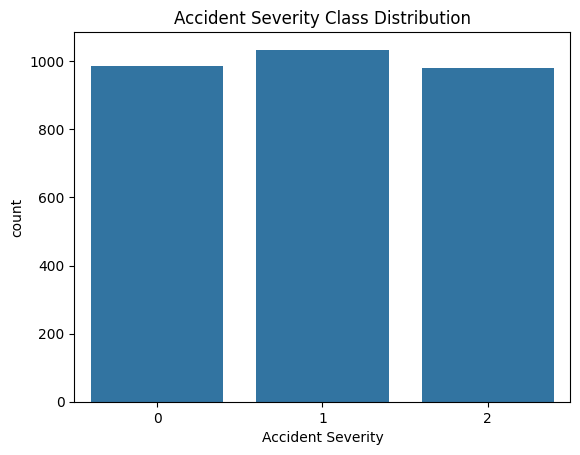

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count values of target variable
print("Class distribution (count):")
print(df['Accident Severity'].value_counts())

print("\nClass distribution (percentage):")
print(df['Accident Severity'].value_counts(normalize=True) * 100)

# Plot a bar chart for better visualization
sns.countplot(x='Accident Severity', data=df)
plt.title('Accident Severity Class Distribution')
plt.show()

In [66]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.3283333333333333
              precision    recall  f1-score   support

           0       0.29      0.27      0.28       197
           1       0.34      0.36      0.35       207
           2       0.34      0.36      0.35       196

    accuracy                           0.33       600
   macro avg       0.33      0.33      0.33       600
weighted avg       0.33      0.33      0.33       600



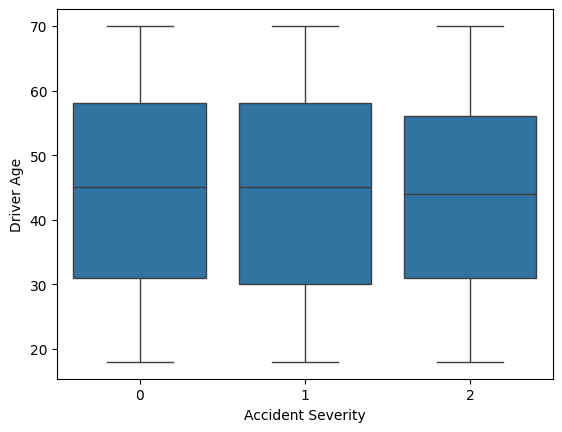

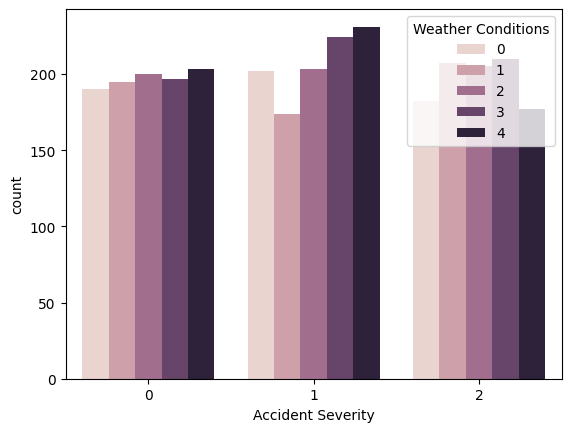

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: pick one or two key features to inspect
sns.boxplot(x='Accident Severity', y='Driver Age', data=df)
plt.show()

sns.countplot(x='Accident Severity', hue='Weather Conditions', data=df)
plt.show()

In [70]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()# model object 

model_lr.fit(X_train,y_train) 

LogisticRegression()

In [71]:
y_pred=model_lr.predict(X_test)
print('d')

d


🔹 Training Logistic Regression...
🔹 Training Decision Tree...
🔹 Training Random Forest...
🔹 Training KNN...
🔹 Training SVM...
🔹 Training Gradient Boosting...
🔹 Training XGBoost...
🔹 Training CatBoost...

🎯 Model Comparison Results:

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.365000   0.365881  0.362037  0.353376
1                  SVM  0.345000   0.115000  0.333333  0.171004
2                  KNN  0.333333   0.336139  0.333304  0.326190
3    Gradient Boosting  0.333333   0.332953  0.332934  0.332465
4              XGBoost  0.328333   0.326714  0.327889  0.327045
5        Random Forest  0.316667   0.314397  0.315515  0.314636
6             CatBoost  0.315000   0.314299  0.314473  0.314221
7        Decision Tree  0.306667   0.306118  0.306520  0.305544


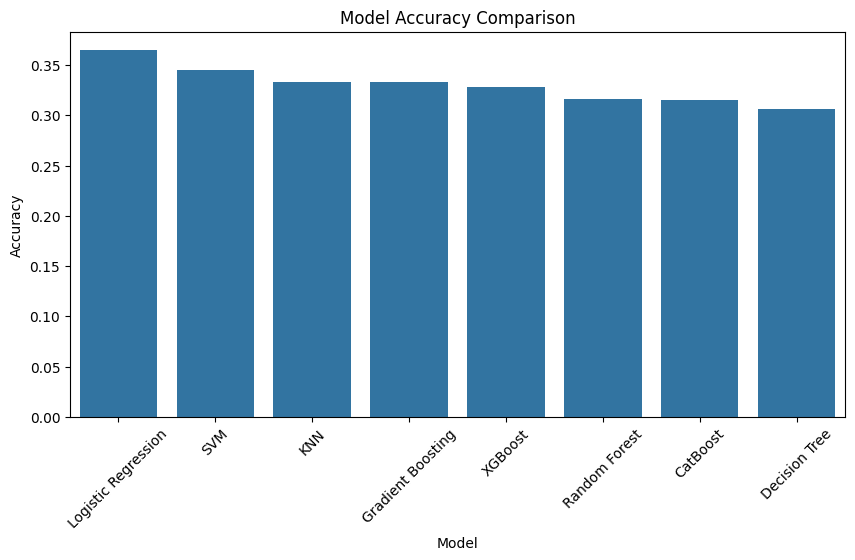


🏆 Best Model: Logistic Regression

Classification Report for Best Model:
               precision    recall  f1-score   support

           0       0.38      0.33      0.35       197
           1       0.36      0.53      0.43       207
           2       0.36      0.23      0.28       196

    accuracy                           0.36       600
   macro avg       0.37      0.36      0.35       600
weighted avg       0.37      0.36      0.35       600



In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# ✅ Dictionary of models to train
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='mlogloss'),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

# ✅ Train & evaluate all models
results = []

for name, model in models.items():
    print(f"🔹 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

# ✅ Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# ✅ Display results
print("\n🎯 Model Comparison Results:\n")
print(results_df)

# ✅ Bar Plot for Visualization
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.show()

# ✅ Optional: Show best model’s detailed report
best_model_name = results_df.iloc[0]['Model']
print(f"\n🏆 Best Model: {best_model_name}")

best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)
print("\nClassification Report for Best Model:\n", classification_report(y_test, y_pred_best))

In [85]:
import streamlit as st
print('done')

done


In [87]:
import joblib

joblib.dump(model, "road_accident_model.pkl")
print("✅ Model saved as road_accident_model.pkl")

✅ Model saved as road_accident_model.pkl


In [88]:
joblib.dump(logreg, "road_accident_model.pkl")

NameError: name 'logreg' is not defined

In [89]:
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [90]:
log_reg = LogisticRegression(...)

In [91]:
pipeline.fit(X_train, y_train)

NameError: name 'pipeline' is not defined

In [92]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [93]:
logreg_pipeline = make_pipeline(StandardScaler(), LogisticRegression())
logreg_pipeline.fit(X_train, y_train)

NameError: name 'make_pipeline' is not defined

In [96]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [97]:
logreg_pipeline = make_pipeline(StandardScaler(), LogisticRegression())
logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [98]:
import joblib
joblib.dump(logreg_pipeline, "road_accident_model.pkl")
print("✅ Model saved as road_accident_model.pkl")

✅ Model saved as road_accident_model.pkl


In [99]:
joblib.dump(model, "road_accident_model.pkl")

['road_accident_model.pkl']